<a href="https://colab.research.google.com/github/MarleneChevalier/Optimisation/blob/master/Projet_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimisation : Regressions de Ridge et LASSO 
====================================
Marlène Chevalier - Executive Master Statistique et Big Data

Juillet 2020 

Sujet :
====
Il s'agit d'un mini projet, sous forme d'un rapport expliquant les résultats obtenus à partir des méthodes d'optimisation vues en cours. Le package ScikitLearn ne devra pas être utilisé, sauf éventuellement pour vérifier les résultats obtenus.  
<http://scikit-learn.org/ Scikit-Learn>

**Les données choisies**  
Il s'agit de données concernant la consommation d'énergie dans un immeuble à basse consommation. Le fichier a été extrait de kaggle et vient de l'université de Mons (Belgique) : *KAG_energydata_complete.csv*.  
https://www.kaggle.com/loveall/appliances-energy-prediction  

Il est constitué de 19735 lignes qui constituent chacune un enregistrement de mesures faites entre janvier et mars 2016 sur 29 variables : 
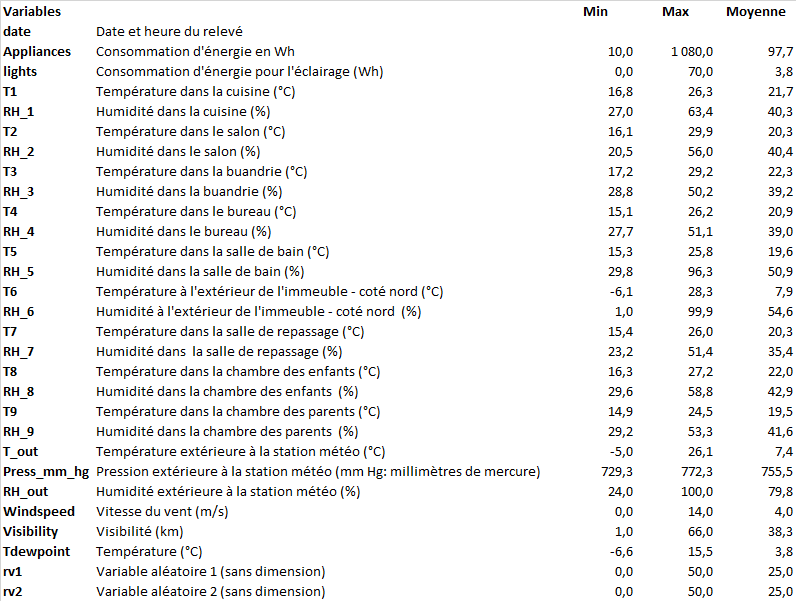   

Il n'y a pas de valeurs manquantes.


Librairies utilisées
====================================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import sklearn as sl
import statsmodels.api as sm
import pandas.util.testing as tm
import sklearn.linear_model as skl
import sklearn.metrics as sklmet
import tqdm as tqdm
import test as t

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Préparation des données
---------------


__Chargement des données__

In [2]:
#Fonction pour chargement via google collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Chargement de la base de données
id = '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'
downloaded = drive.CreateFile({'id': '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'})
downloaded.GetContentFile('KAG_energydata_complete.csv')


In [3]:
data_energy = pd.read_csv('KAG_energydata_complete.csv')

In [ ]:
#print(data_energy.describe)

__Distribution de la consommation électrique__

Consommation électrique moyenne :  97.7 W/h
Ecart type : 102.5
Consommation électrique médiane : 60.0 W/h


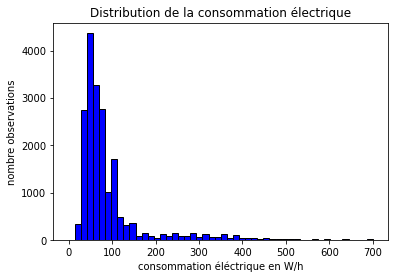

In [4]:
plt.hist(data_energy['Appliances'], range = (0, 700), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('consommation éléctrique en W/h')
plt.ylabel('nombre observations')
plt.title('Distribution de la consommation électrique')
print('Consommation électrique moyenne : ',round(np.mean(data_energy['Appliances']),1),'W/h')
print('Ecart type :',round(np.std(data_energy['Appliances']),1))
print('Consommation électrique médiane :',round(np.quantile(data_energy['Appliances'], 0.5),3),'W/h')

La consommation éléctrique est fortement concentrée entre 30 et 80 Wh, avec une valeur médiane à 60Wh.

__Corrélations des variables du jeu de données__

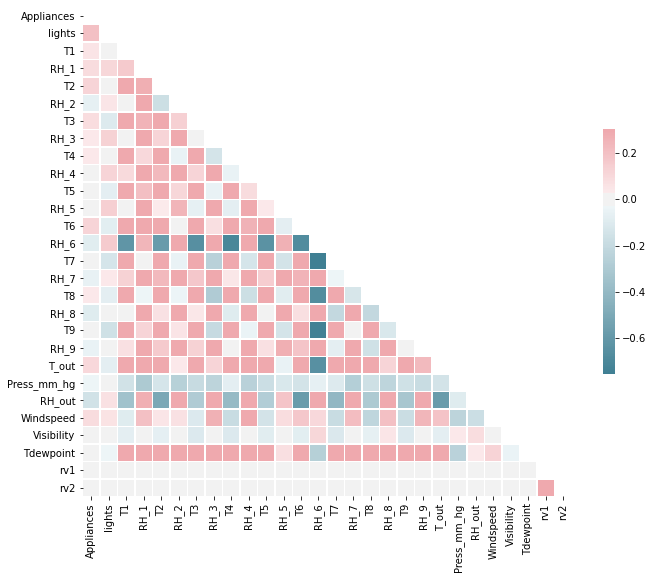

In [5]:
# Calcul des corrélations
corr = data_energy.corr()
# Masque triangle du graphique
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Parametres graphiques
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Tracé du graphe
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Il apparait de fortes corrélations : 
* entre les taux d'humidité extérieur et les mesures de température (RHT et T1 à T9): corrélations négatives 
* entre les températures entre elles (T1 à T9) : corrélation positive  
* entre la mesure de température (Tdewpoint) et les autres températures ainsi que les taux d'humidité

Aucune corrélation entre les variables aléatoires rv1 et rv2 et le reste des variables.

__Séparation du jeu de données complet en un jeu d'apprentissage (80%) et un jeu de test (20%)__

Le jeu d'apprentissage sera utilisé pour construire le modèle, le jeu test pour tester les performance prédictive du modèle.  

In [6]:
from sklearn.model_selection import train_test_split
# Générer l'ens de training. Fixer random_state pour répliquer les resultats ultérieurement.
train = data_energy.sample(frac=0.8, random_state=1)
# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = data_energy.loc[~data_energy.index.isin(train.index)]
# Afficher les dimensions des 2 sets.
print('dimension ensemble apprentisssage ', train.shape)
print('dimension ensemble test ',test.shape)

dimension ensemble apprentisssage  (15788, 29)
dimension ensemble test  (3947, 29)


__Séparer les features $X$ de la variable à prédire $Y$ (Appliances) dans les ensembles d'apprentissage et de test__  

NB : nous conservons dans la matrice de design (features $X$ ) toutes les covariables hormis la date/heure et les 2 variables aléatoires (dont la signification n'est pas connue).

In [7]:
[n,p] = data_energy.shape

# separer la variable à prévoir (Y : Appliances) et des variables prédictives (X) 

# ensembles apprentissage et test pour la variable à predire
Y_train = train['Appliances'] # variable reponse
Y_test = test['Appliances'] # variable reponse

# ensembles apprentissage et test des variables prédictives
X = data_energy 
X_train = train 
X_test = test
X_train.drop(['Appliances', 'date', 'rv1','rv2'], axis=1,inplace=True) # variables features training
X_test.drop(['Appliances', 'date', 'rv1','rv2'], axis=1,inplace=True) # variables features test
[n_train,p_train] = X_train.shape
[n_test,p_test] = X_test.shape

# affichage des dimensions des matrices de design
print('la matrice de design complète contient: ',n,'lignes et ',p,'variables explicatives')
print('la matrice de design d apprentissage contient: ',n_train,'lignes et ',p_train,'variables explicatives')
print('la matrice de design test contient: ',n_test,'lignes et ',p_test,'variables explicatives')

la matrice de design complète contient:  19735 lignes et  29 variables explicatives
la matrice de design d apprentissage contient:  15788 lignes et  25 variables explicatives
la matrice de design test contient:  3947 lignes et  25 variables explicatives


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


__Normalisation des variables par la moyenne et l'écart type de l'ensemble d'apprentissage__

In [8]:
#Normalisation des matrices de design d'apprentissage et de test
mX_train = X_train.mean(axis=0)
sX_train = X_train.std(axis=0)
X_train = (X_train-mX_train)/sX_train
X_test= (X_test-mX_train)/sX_train

In [9]:
#Normalisation des vecteurs d'apprentissage et de test de la variable consommation électrique
mY_train = Y_train.mean()
sY_train = Y_train.std()
Y_train = (Y_train-mY_train)/sY_train 
Y_test = (Y_test-mY_train)/sY_train 

Regression Linéaire
-----------------
Soit la relation linéaire entre les variables du jeu de données
sous forme matricielle :
  $ Y= X w $ .  
  avec $ Y :  $ vecteur de la variable consommation électrique   
  et  $ X :  $ matrice des covariables explicatives  
  n : nombre d'observations et p nombre total de variables 

Lorsque $ n > p $, le système peut se résoudre en utilisant les moindres carrés ordinaires  :
  $$ \umin{ w }  \norm{Xw-Y}^2 $$
les coefficients solution des MCO sont :
  $$ w_{MCO} = (X^\top X)^{-1} X^\top Y $$


In [11]:
w = np.linalg.solve( X_train.transpose().dot(X_train), X_train.transpose().dot(Y_train) )

__Qualité de la prévision par les MCO__

1- Graphique consommation électrique : Prevision / Vraie valeur 

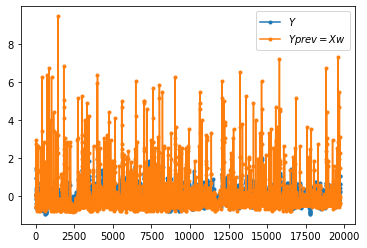

In [12]:

plt.clf
plt.plot(X_test.dot(w), '.-' )
plt.plot(Y_test, '.-' )
plt.axis('tight')
plt.legend(('$Y$', '$Yprev = $$X w$'));

Il apparait que la prédiction de la consommation électrique (Yprev) semble plus fluctuante que la vraie consommation.

2- Coefficient de détermination : R2

In [13]:
# R2
R2 = ((X_train.dot(w) - Y_train.mean())**2).sum() / ((Y_train - Y_train.mean())**2).sum()
print('R2 MCO : ',round(R2,3))

R2 MCO :  0.169


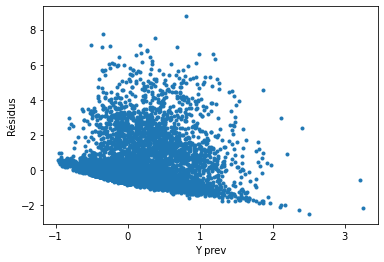

In [14]:
# graphique des résidus
plt.clf
plt.plot(X_train.dot(w), Y_train - X_train.dot(w), ".")
plt.xlabel("Y prev")
plt.ylabel("Résidus");

Le coefficient de determination (R2) obtenu n'est pas satisfaisant : il vaut 0.169 , ce qui signifie que le modèle explique que 16.9% de la variabilité de la variable "consommation éléctrique".
Effet, le graphique des résidus (résidus vs prévisions de la consommation électrique) indique une variance importante (nuage de points éparpillés). 
Cela est dû à des corrélations fortes entre les variables explicatives (comme vue avec la matrice de corrélation).

__Erreurs de prévision évaluées sur l'ensemble de test__

 L'erreur relative de prédiction : $ERP = (Xw - Y)/Y$   
 La MSE (Mean squared error) : $({Xw-Y})^2 /n_{test}$

In [15]:
E_MCO = np.linalg.norm(X_test.dot(w)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_MCO));

Erreur relative de prédiction : 0.9226314020060525


In [16]:
mse_MCO = np.sum( (X_test.dot(w)-Y_test)**2 ) / n_test
#mse_MCO = np.mean( (X_test.dot(w)-Y_test)**2 )
print('MSE MCO : ', mse_MCO)

MSE MCO :  0.8339458909412615


__Regression linéaire avec la fonction OLS de statsmodels__

In [17]:
reg = sm.OLS(Y_train,X_train)
resReg = reg.fit()
print(resReg.summary())

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.169
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              127.8
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                        20:05:06   Log-Likelihood:                         -20945.
No. Observations:               15788   AIC:                                  4.194e+04
Df Residuals:                   15763   BIC:                                  4.213e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Les résultats de la regression linéaire par la fonction OLS sont les mêmes : le R2 très faible indique que la regression linéaire n'est pas satisfaisante pour expliquer la consommation d'électricité.

Nous devons tester des modèles plus performants avec un grand nombre de variables et qui supporte la colinéarité.


Régression Régularisée de Ridge
=======
Les méthodes de régression régularisée ont pour objectif de réduire la variabilité du modèle, ce qui nécessite d'introduire un biais (arbitrage biais/variance). Ces méthodes consistent à introduire une pénalité dans la fonction de perte à minimiser.

La régression régularisée de Ridge est une régression sous contrainte quadratique sur les coefficients . Elle est definie par :  
  $$ \umin{ w }  \norm{Xw-Y}^2 + \lambda \norm{w}^2 $$
où $\lambda>0$ est le parametre de régularisation.
La pénalité est ici en norme $\ell^2$ : $ \lambda \norm{w}^2 $

Les coefficients solution peuvent s'écrire : 
  $$ w0_{Ridge} = (X^\top X + \lambda \text{Id}_p )^{-1} X^\top Y, $$
  $$ w1_{Ridge} = X^\top ( XX^\top + \lambda \text{Id}_n)^{-1} Y, $$


In [ ]:
Lambda = .2*np.linalg.norm(X_train)**2;
#Lambda = 10000/p_train

w0_Ridge = np.linalg.solve( X_train.transpose().dot(X_train) + Lambda*np.eye(p_train), X_train.transpose().dot(Y_train) )
u = np.linalg.solve( X_train.dot(X_train.transpose()) + Lambda*np.eye(n_train), Y_train )
w1_Ridge = X_train.transpose().dot( u )
print( ('l erreur relative entre w0_Ridge et w1_Ridge : ' + str( np.linalg.norm(w0_Ridge-w1_Ridge)/np.linalg.norm(w0_Ridge) ) ) )

L'erreur relative tend vers 0 : les vecteurs de coefficients w0_Ridge et w1_Ridge sont équivalents.

__Optimisation de la valeur de $\lambda$__

Voyons maintenant si on peut choisir $\lambda$ de manière optimale . Il s'agit de regarder l'evolution de l'erreur en fonction de $\lambda$.

Ridge: 91.32604558679046%


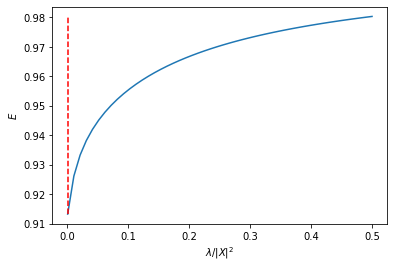

In [19]:
q = 50
lmax = np.linalg.norm(X_train,2)**2 # norme L2 de X_train
lambda_list = lmax*np.linspace(0.001,0.5,q) # 50 valeurs de lambda 
X = np.zeros( (p_train,q) ) # initialisation de X (25,50) à 0
E = np.zeros( (q,1) )# initialisation de E (50,1) à 0
for i in np.arange(0,q):
    Lambda = lambda_list[i]
    x = np.linalg.solve(X_train.transpose().dot(X_train) + Lambda*np.eye(p_train), X_train.transpose().dot(Y_train) )
    X[:,i] = x.flatten() # bookkeeping
    E[i] = np.linalg.norm(X_train.dot(x)-Y_train) / np.linalg.norm(Y_train)
# lambda optimal
i = E.argmin()
lambda0 = lambda_list[i]
xRidge = X[:,i]
print( 'Ridge: ' + str(E.min()*100) + '%' )
# graphique des erreurs de prediction en fonction de lambda.
plt.clf
plt.plot(lambda_list/lmax, E)
plt.plot( [lambda0/lmax,lambda0/lmax], [E.min(), E.max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X|^2$')
plt.ylabel('$E$');

__Evolution des coefficients de regression $w$ en fonction
de $\lambda$__

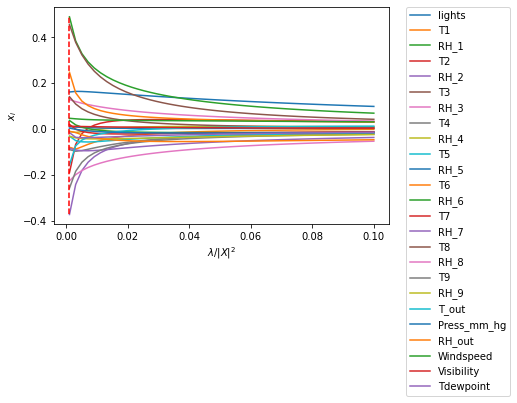

In [ ]:
class_names = X_train.columns
plt.clf
for i in np.arange(0,p_train):
   plt.plot(lambda_list/lmax, X[i,:], label=class_names[i])
plt.plot( [lambda0/lmax,lambda0/lmax], [X.flatten().min(), X.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X|^2$')
plt.ylabel('$x_i$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Dans ce 2ème graphique, il apparait que les coefficients de chaque variables explicatives se rapprochent pour de petites valeurs de $\lambda$.

D'après ces 2 graphiques le $\lambda$ optimal est proche de 0.

Calculons les coefficients de regression de Ridge pour $\lambda$ = 0.01

In [24]:
Lambda = 0.25/p_train # 0.25/25
print(Lambda)
w_Ridge = np.linalg.solve( X_train.transpose().dot(X_train) + Lambda*np.eye(p_train), X_train.transpose().dot(Y_train) )

0.01


__Erreurs de prévision évaluées sur l'ensemble de test__

In [25]:
E_Ridge = np.linalg.norm(X_test.dot(w_Ridge)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_Ridge));

Erreur relative de prédiction : 0.9226315169733598


In [26]:
mse_Ridge = np.sum( (X_test.dot(w_Ridge)-Y_test)**2 ) / n_test
print('MSE Ridge : ', mse_Ridge)

MSE Ridge :  0.8339460987740301


__Regression Ridge avec scikit learn__

Regardons les résultats avec la fonction Lasso de scikit learn.  

In [ ]:
regRidge = skl.Ridge(alpha=10,fit_intercept=False,normalize=False)
regRidge.fit(X_train, Y_train)
regRidge_pred_train= regRidge.predict(X_train)
print('MSE Ridge sur l ens. apprentissage :', np.sqrt(sklmet.mean_squared_error(Y_train,regRidge_pred_train)))

MSE Ridge sur l ens. apprentissage : 0.9118434096148439


Erreur de prédiction et MSE 

In [ ]:
E_Ridgeskl= np.linalg.norm(X_test.dot(regRidge.coef_)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_Ridgeskl));

Erreur relative de prédiction : 0.9227438325868912


In [ ]:
#mse_Ridgeskt = np.sum( (X_test.dot(regRidge.coef_)-Y_test)**2 ) / n_test
mse_Ridgeskt=sklmet.mean_squared_error(Y_test,X_test.dot(regRidge.coef_))
print('MSE Ridge sur l ensemble test : ', mse_Ridgeskt)

MSE Ridge sur l ensemble test :  0.8341491503002267


Les résultats de la regression de Ridge obtenus manuellement sont confirmés par l'application de la fonction Ridge de scikit learn. Néanmoins, ils ne sont pas meilleurs qu'avec une regression linéaire sans contrainte (moindres carrés ordinaires).  MSE Ridge est aussi de 0.834.

Régression Régularisée LASSO
---------------------
La régression régularisée LASSO  est une régressions linéaire avec une contrainte linéaire sur les coefficients. Elle est définie par : 
$$ \umin{w} J(w) \eqdef \frac{1}{2}\norm{X w-y}^2 + \lambda \norm{w}_1. $$  
où $\lambda>0$ est le paramètre de régularisation.  
La pénalité est ici en norme $\ell^1$  : $ \lambda \norm{w}^1 $  avec $ \norm{w}_1 \eqdef \sum_i \abs{w_i} . $

L'avantage de LASSO est que ce dispositif permet de faire également de la sélection de variables, parmi les nombreuses à disposition dans le jeu de données, en annulant certains coefficients de la regression.
Mais les coefficients de LASSO ne se calculent pas directement (pas de solution analytique comme pour MCO ou Ridge). Ils se calculent à partir d'algorithmes (Iterative Soft Thresholding, Least Angle Regression, Forward stagewise...).

In [29]:
def J(w,Lambda): return 1/2*np.linalg.norm(X_train.dot(w)-Y_train)**2 + Lambda*np.linalg.norm(w,1)

L'algorithme ISTA (Iterative Shrinkage-Thresholding Algorithm ) consiste :  
1- faire un pas de gradient vers l'avant selon la direction de la fonction $\frac{1}{2}\norm{X w-y}^2$  
2- puis un pas de gradient vers l'arriere avec une pénalité
$\ell^1$. 
Ce pas est l'opérateur de seuil soft: 
$$ \Ss_s(x) \eqdef \max( \abs{x}-\lambda,0 ) \text{ * sign}(x).  $$

In [30]:
def Soft(x,s): return np.maximum( abs(x)-s, np.zeros(x.shape)  ) * np.sign(x)

L'algorithme ISTA est le suivant : 
$$ w_{k+1} \eqdef \Ss_{\la\tau}( w_k - \tau X^\top ( X w_k - Y )  ), $$
où le pas qui assure la convergence vérifie $ 0 < \tau <
2/\norm{X}^2 $  


Opérateur de seuil :

(-5.5, 5.5, -3.3, 3.3)

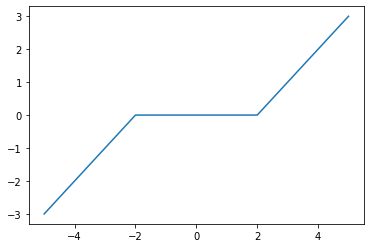

In [32]:
t = np.linspace(-5,5,201)
plt.clf
plt.plot(t,Soft(t,2)) 
plt.axis('tight')

Le pas, opérateur de seuil, est constant en [-2,2] et croisant ailleurs.

Taille du pas descente

In [33]:
tau = 1/np.linalg.norm(X_train,2)**2
print('Tau:',tau)

Tau: 6.789941181038171e-06


Choix du paramètre de régularisation $\la$.




In [34]:
lmax = abs( X_train.transpose().dot(Y_train) ).max()
Lambda = lmax /10
print('Lambda :',Lambda)

Lambda : 311.85406324873355


Initialisation du vecteur de coefficients $w$ à 0.

In [35]:
w = np.zeros((p_train,1))

Le pas unique ISTA

In [36]:
C = X_train.transpose().dot(X_train)
u = X_train.transpose().dot(Y_train)
def ISTA(w,Lambda,tau): return Soft( w-tau*( C.dot(w)-u ), Lambda*tau )
w = ISTA(w,Lambda,tau)

Algorithme ISTA 

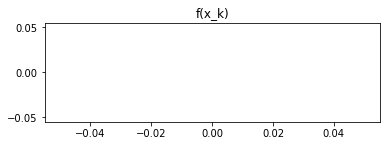

In [61]:
niter = 100
flist = np.zeros((niter,1))
x = np.zeros((p_train,1))
for i in range(0,niter):
    flist[i] = J(x,Lambda)
    x = ISTA(x,Lambda,tau)
ndisp = int(niter/4)

plt.clf
plt.subplot(2,1,1)
plt.plot(flist[0:ndisp])
plt.axis('tight')
plt.title('f(x_k)');


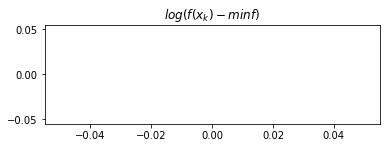

In [60]:
plt.clf
plt.subplot(2,1,2)
e = np.log10( flist[0:ndisp]-flist.min())
plt.plot(e-e[0])
plt.axis('tight')
plt.title('$log(f(x_k)-min f)$');

Erreur en fonction de $\lambda$ (regularization path)

In [57]:
q = 50
lambda_list = lmax*np.linspace(0.001,0.5,q)
X = np.zeros( (p_train,q) )
E = np.zeros( (q,1) )
x = np.zeros((p_train,1))
niter = 500
for iq in np.arange(0,q):
    Lambda = lambda_list[iq]
    # ISTA #
    for i in np.arange(0,niter):
        x = ISTA(x,Lambda,tau)
    X[:,iq] = x.flatten() # bookkeeping
    E[iq] = np.linalg.norm(X_train.dot(x)-Y_train) / np.linalg.norm(Y_train)
# find optimal Lambda
i = E.argmin()
lambda0 = lambda_list[i]
xSparse = X[:,i]
print( 'Lasso: ' + str(E.min()*100) + '%' )
# Display error evolution.
plt.clf
plt.plot(lambda_list/lmax, E)
plt.plot( [lambda0/lmax,lambda0/lmax], [E.min(),E.max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|A^* y|_\infty$')
plt.ylabel('$E$')

AttributeError: ignored

Evolution de $w$ en fonction de
$\lambda$ (regularization path)

In [56]:
plt.clf
for i in np.arange(0,p_train):
    plt.plot(lambda_list/lmax, X[i,:], label=class_names[0][i])
plt.plot( [lambda0/lmax,lambda0/lmax], [X.flatten().min(),X.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|A^* y|_\infty$')
plt.ylabel('$x_i$')
plt.legend()

NameError: ignored

Comparaison du poids de Ridge et de LASSO

In [ ]:
plt.clf
plt.bar(np.arange(1,p_train+1), abs(xSparse))
plt.bar(np.arange(1,p_train+1), -abs(xRidge))
plt.legend(('Lasso', 'Ridge'))

NameError: ignored

Erreurs de prévision évaluées sur l'ensemble de test :

In [ ]:
E_Lasso = np.linalg.norm(X_test.dot(w1_Ridge)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_Lasso));

In [ ]:
mse_Lasso = np.sum( (X_test.dot(w1_Ridge)-Y_test)**2 ) / n_test
print('MSE Lasso : ', mse_Lasso)

__Regression Lasso avec scikit learn__

Regardons les résultats avec la fonction Lasso de scikit learn.  
Regardons le nombre de variables explicatives selectionnées en fonction de alpha avec les valeurs R2 associées (tableau de valeurs et graphiques ci- dessous)

In [ ]:
 resL = []
for alf in tqdm.tqdm([0.00001,0.0001,0.0005,0.001,0.002,0.003,0.004,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]):
    regLasso2 = skl.Lasso(alpha=alf,fit_intercept=False,normalize=False)
    regLasso2_pred_train = regLasso2.fit(X_train, Y_train)
    regLasso2_r2 = sklmet.r2_score(Y_test,regLasso2_pred_train.predict(X_test))
    resL.append({'lambda':alf,'r2':regLasso2_r2,'nb coef nuls':sum(regLasso2_pred_train.coef_==0)})
dfL=pd.DataFrame(resL)
print(dfL)

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.238041116914246, tolerance: 1.5787000000002125
  positive)
100%|██████████| 19/19 [00:02<00:00,  7.18it/s]


     lambda        r2  nb coef nuls
0   0.00001  0.148706             0
1   0.00010  0.148555             0
2   0.00050  0.147597             1
3   0.00100  0.147080             2
4   0.00200  0.145933             4
5   0.00300  0.144322             4
6   0.00400  0.142365             5
7   0.00500  0.140329             5
8   0.01000  0.132049             9
9   0.01500  0.125591            13
10  0.02000  0.119078            14
11  0.03000  0.099627            15
12  0.04000  0.084991            18
13  0.05000  0.076580            20
14  0.10000  0.044642            23
15  0.20000 -0.000035            25
16  0.30000 -0.000035            25
17  0.40000 -0.000035            25
18  0.50000 -0.000035            25


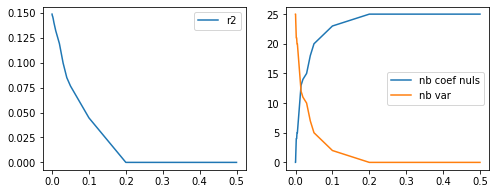

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(dfL['lambda'],dfL['r2'],label='r2')
ax[1].plot(dfL['lambda'],dfL['nb coef nuls'],label="nb coef nuls")
ax[1].plot(dfL['lambda'],regLasso2_pred_train.coef_.shape[0]-dfL['nb coef nuls'],label="nb var")
ax[0].legend()
ax[1].legend();

Il apparait que les coefficient R2 sont faibles (<=15%) et que pour alpha=0.015, la moitié des variables sont selectionnées , soit 12 variables (les coefficients des 13 autres variables sont nulles).  

Retenons la valeur 0.015 pour le coefficient alpha pour le calcul du Lasso.



In [ ]:
regLasso = skl.Lasso(alpha=0.015,fit_intercept=False,normalize=False)
regLasso.fit(X_train, Y_train)
regLasso_pred_train= regLasso.predict(X_train)
print('MSE Lasso sur l ens. apprentissage :', np.sqrt(sklmet.mean_squared_error(Y_train,regLasso_pred_train)))

MSE Lasso sur l ens. apprentissage : 0.9258310734200628


Erreur de prédiction et MSE 

In [ ]:
E_Lassoskl= np.linalg.norm(X_test.dot(regLasso.coef_)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_Lassoskl));

Erreur relative de prédiction : 0.9227217968948164


In [ ]:
mse_Lassoskt = np.sum( (X_test.dot(regLasso.coef_)-Y_test)**2 ) / n_test
print('MSE Lasso sur l ensemble test : ', mse_Lassoskt)

MSE Lasso sur l ensemble test :  0.834109310783208


Les résultats de la regression Lasso sont très proches des résultats de la regression de Ridge.

__Conclusion__  
Les résultats obtenus par les regressions (MCO, Ridge, Lasso) ne sont pas satisfaisants (erreurs très élevées) pour expliquer la consommation électrique de ce jeu de données.